--- Top 5 Melhorias (Speedup) ---
Q20: 138.5x mais rápido
Q06: 4.2x mais rápido
Q15: 3.2x mais rápido
Q03: 3.2x mais rápido
Q04: 3.1x mais rápido


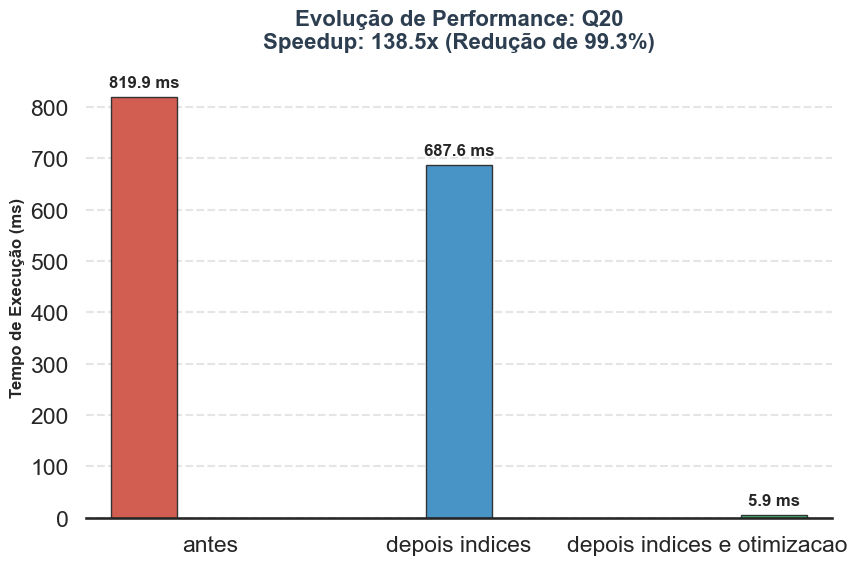

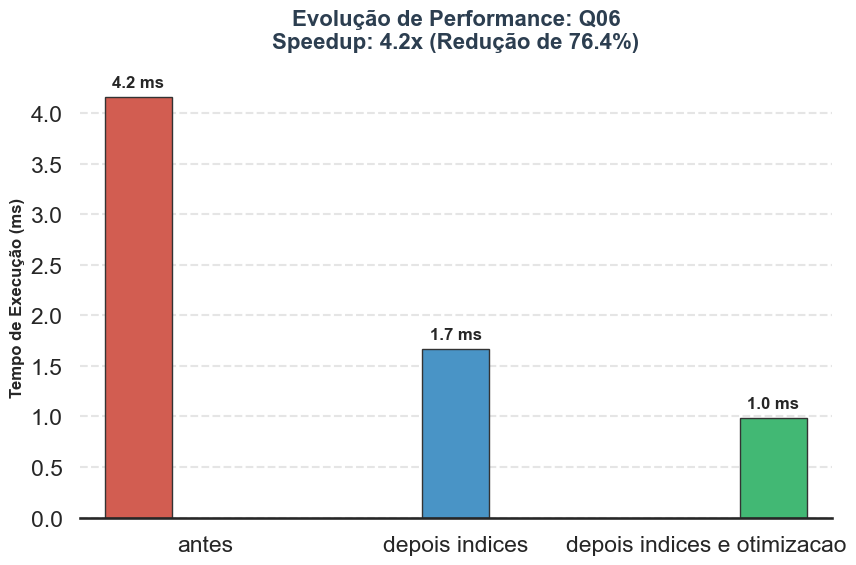

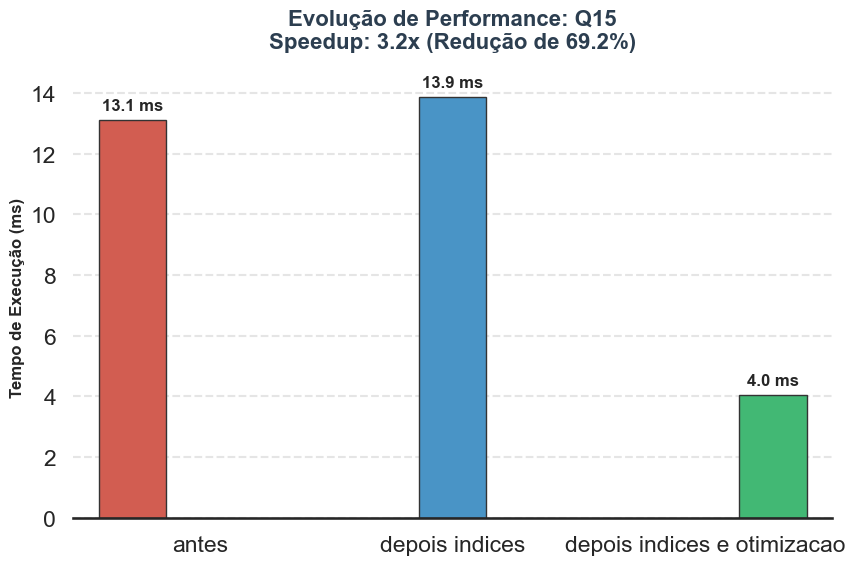

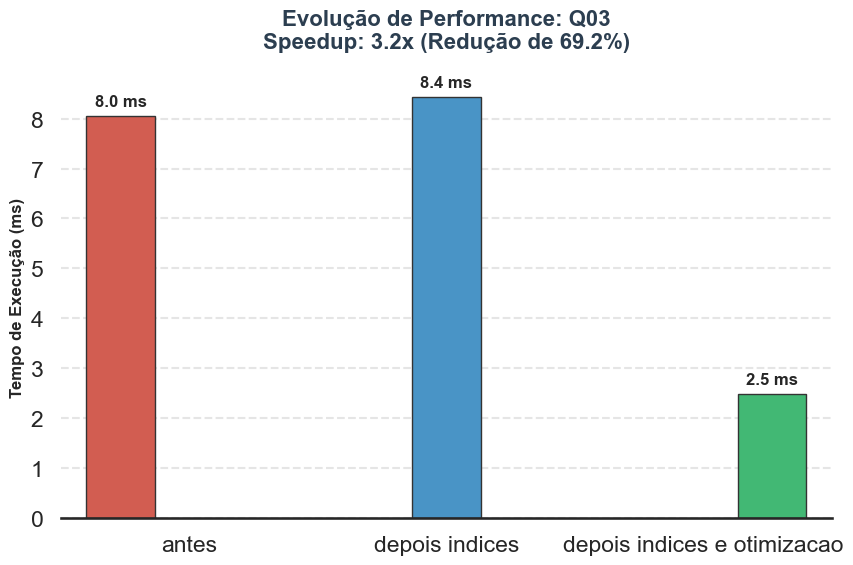

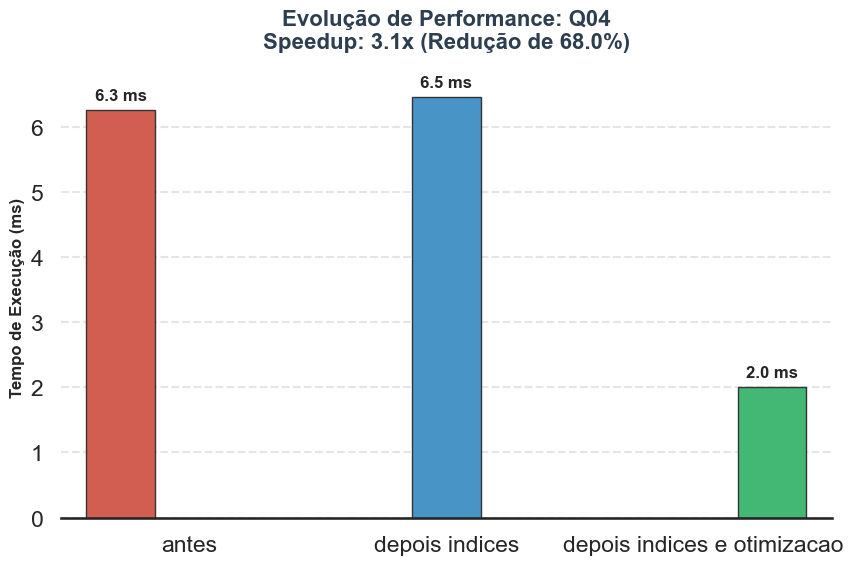


Todos os gráficos foram gerados!


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# --- Configuração de Estilo Profissional ---
# 'talk' aumenta ligeiramente as fontes, ideal para relatórios/slides
sns.set_theme(style="white", context="talk") 

# 1. Carregar os dados
file_path = 'bd054 benchmarking - Benckmark_results.csv'

if not os.path.exists(file_path):
    print(f"Erro: O ficheiro '{file_path}' não foi encontrado.")
else:
    df = pd.read_csv(file_path)

    # 2. Preparar os dados
    df['total_time'] = pd.to_numeric(df['total_time'], errors='coerce')

    # Definir Ordem e CORES SEMÂNTICAS
    # Vermelho (Alerta/Lento) -> Azul (Intermédio) -> Verde (Sucesso/Rápido)
    ordem_etapas = ['antes', 'depois indices', 'depois indices e otimizacao']
    cores_personalizadas = {
        'antes': '#e74c3c',                  # Vermelho suave
        'depois indices': '#3498db',         # Azul
        'depois indices e otimizacao': '#2ecc71' # Verde Esmeralda
    }

    # Filtrar e ordenar
    df = df[df['etapa'].isin(ordem_etapas)].copy()
    df['etapa'] = pd.Categorical(df['etapa'], categories=ordem_etapas, ordered=True)

    # 3. Calcular Melhorias e Speedup
    pivot_df = df.pivot_table(index='query_name', columns='etapa', values='total_time', aggfunc='mean')
    
    # Identificar a coluna final disponível
    col_final = 'depois indices e otimizacao' if 'depois indices e otimizacao' in pivot_df.columns else 'depois indices'
    
    # Calcular Speedup (Ex: 10x mais rápido) e % de Melhoria
    pivot_df['speedup'] = pivot_df['antes'] / pivot_df[col_final]
    pivot_df['melhoria_pct'] = (pivot_df['antes'] - pivot_df[col_final]) / pivot_df['antes'] * 100

    # Selecionar Top 5
    top_n = 5
    top_queries = pivot_df.nlargest(top_n, 'melhoria_pct').index.tolist()

    print(f"--- Top {top_n} Melhorias (Speedup) ---")
    for q in top_queries:
        print(f"{q}: {pivot_df.loc[q, 'speedup']:.1f}x mais rápido")

    df_final = df[df['query_name'].isin(top_queries)]

    # 4. Gerar Gráficos Individuais
    for query in top_queries:
        df_query = df_final[df_final['query_name'] == query]
        
        # Criar figura (tamanho ajustado para caber bem em A4)
        fig, ax = plt.subplots(figsize=(9, 6))
        
        # Gráfico de Barras
        chart = sns.barplot(
            data=df_query,
            x='etapa',
            y='total_time',
            hue='etapa',
            palette=cores_personalizadas,
            ax=ax,
            edgecolor=".2", # Pequena borda cinza para definição
            linewidth=1
        )
        
        # Títulos e Informações de Impacto
        speedup_val = pivot_df.loc[query, 'speedup']
        melhoria_val = pivot_df.loc[query, 'melhoria_pct']
        
        ax.set_title(
            f'Evolução de Performance: {query}\n'
            f'Speedup: {speedup_val:.1f}x (Redução de {melhoria_val:.1f}%)', 
            fontsize=16, 
            fontweight='bold',
            pad=20,
            color='#2c3e50'
        )
        
        ax.set_ylabel('Tempo de Execução (ms)', fontsize=12, fontweight='bold')
        ax.set_xlabel('') # Removemos label do X pois as categorias já explicam
        
        # Valores nas barras
        for container in chart.containers:
            chart.bar_label(container, fmt='%.1f ms', padding=5, fontsize=12, fontweight='bold')

        # Ajustes de Layout "Clean"
        ax.yaxis.grid(True, linestyle='--', alpha=0.5) # Grid suave horizontal
        ax.xaxis.grid(False)
        sns.despine(left=True) # Remove eixo vertical esquerdo
        
        # Remover legenda automática (já está nas cores/eixo X)
        if ax.get_legend():
            ax.get_legend().remove()

        plt.tight_layout()
        plt.show()

print("\nTodos os gráficos foram gerados!")


In [ ]:
# --- GUARDAR GRÁFICOS COMO IMAGENS ---
# Execute esta célula quando quiser guardar os gráficos em ficheiros PNG

for query in top_queries:
    df_query = df_final[df_final['query_name'] == query]
    
    # Criar figura
    fig, ax = plt.subplots(figsize=(9, 6))
    
    # Gráfico de Barras
    chart = sns.barplot(
        data=df_query,
        x='etapa',
        y='total_time',
        hue='etapa',
        palette=cores_personalizadas,
        ax=ax,
        edgecolor=".2",
        linewidth=1
    )
    
    # Títulos e Informações
    speedup_val = pivot_df.loc[query, 'speedup']
    melhoria_val = pivot_df.loc[query, 'melhoria_pct']
    
    ax.set_title(
        f'Evolução de Performance: {query}\n'
        f'Speedup: {speedup_val:.1f}x (Redução de {melhoria_val:.1f}%)', 
        fontsize=16, 
        fontweight='bold',
        pad=20,
        color='#2c3e50'
    )
    
    ax.set_ylabel('Tempo de Execução (ms)', fontsize=12, fontweight='bold')
    ax.set_xlabel('')
    
    # Valores nas barras
    for container in chart.containers:
        chart.bar_label(container, fmt='%.1f ms', padding=5, fontsize=12, fontweight='bold')

    # Ajustes de Layout
    ax.yaxis.grid(True, linestyle='--', alpha=0.5)
    ax.xaxis.grid(False)
    sns.despine(left=True)
    
    # Remover legenda
    if ax.get_legend():
        ax.get_legend().remove()

    plt.tight_layout()
    
    # Guardar
    filename = f'grafico_performance_{query}.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.close(fig)
    
    print(f"Gráfico guardado: {filename}")

print("\nTodos os gráficos foram guardados com sucesso!")
